**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---

# **Integracion I -  📊 Graficos, DF & Recap de inversiones**

---

Tipos de graficos: para mas info consultar https://www.datacamp.com/es/tutorial/types-of-data-plots-and-how-to-create-them-in-python

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset('penguins')
flights = sns.load_dataset('flights')
titanic = sns.load_dataset('titanic')
car_crashes = sns.load_dataset('car_crashes')
fmri = sns.load_dataset('fmri')
diamonds = sns.load_dataset('diamonds')


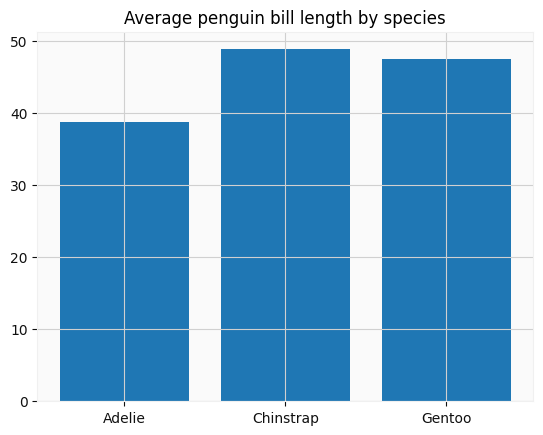

In [ ]:
# Data preparation
penguins_grouped = penguins[['species', 'bill_length_mm']].groupby('species').mean().reset_index()

#Creating a bar chart
plt.bar(penguins_grouped['species'], penguins_grouped['bill_length_mm'])
plt.title('Average penguin bill length by species')
plt.show()


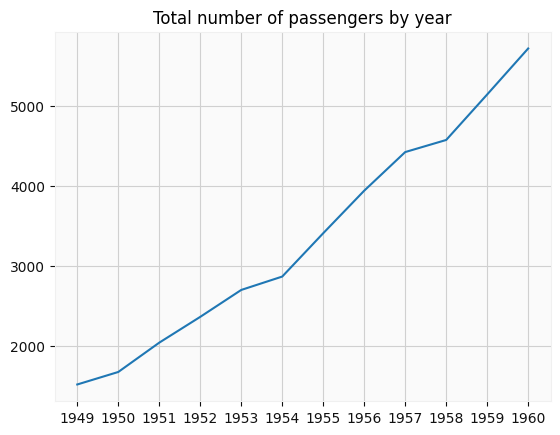

In [ ]:
# Data preparation
flights_grouped = flights[['year', 'passengers']].astype({'year': 'string'}).groupby('year').sum().reset_index()
plt.plot(flights_grouped['year'], flights_grouped['passengers'])
plt.title('Total number of passengers by year')
plt.show()


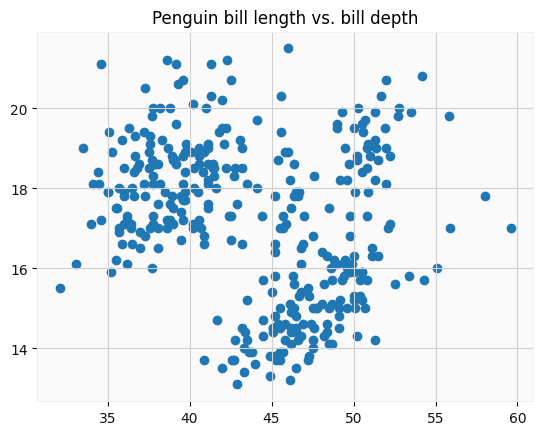

In [ ]:
# Creating a scatter plot
plt.scatter(penguins['bill_length_mm'], penguins['bill_depth_mm'])
plt.title('Penguin bill length vs. bill depth')
plt.show()


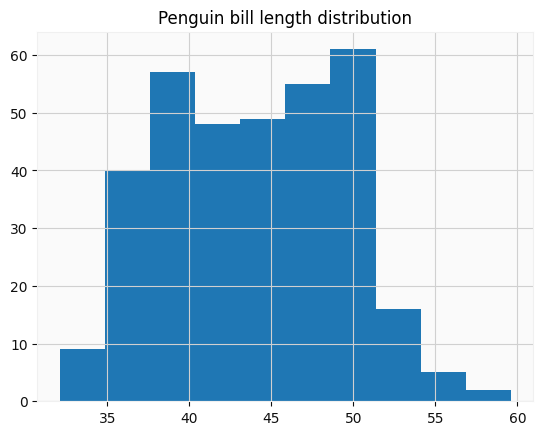

In [ ]:
# Creating a histogram
plt.hist(penguins['bill_length_mm'])
plt.title('Penguin bill length distribution')
plt.show()


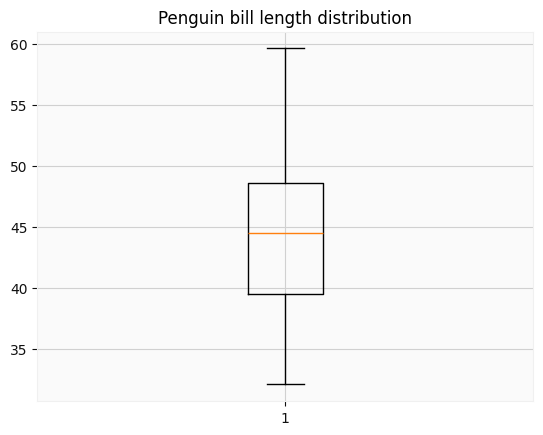

In [ ]:
# Data preparation
penguins_cleaned = penguins.dropna()
plt.boxplot(penguins_cleaned['bill_length_mm'])
plt.title('Penguin bill length distribution')
plt.show()


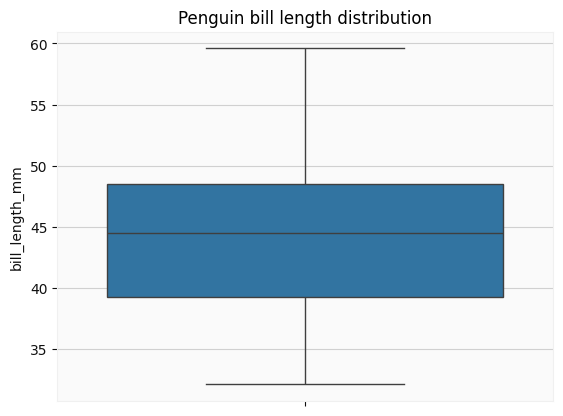

In [ ]:
# Creating a box plot
sns.boxplot(data=penguins, y='bill_length_mm')
plt.title('Penguin bill length distribution')
plt.show()


/tmp/ipython-input-1182186677.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



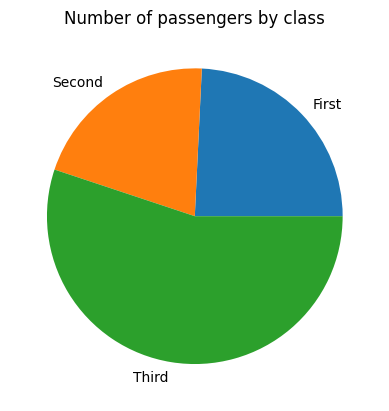

In [ ]:
# Data preparation
titanic_grouped = titanic.groupby('class')['pclass'].count().reset_index()
plt.pie(titanic_grouped['pclass'], labels=titanic_grouped['class'])
plt.title('Number of passengers by class')
plt.show()


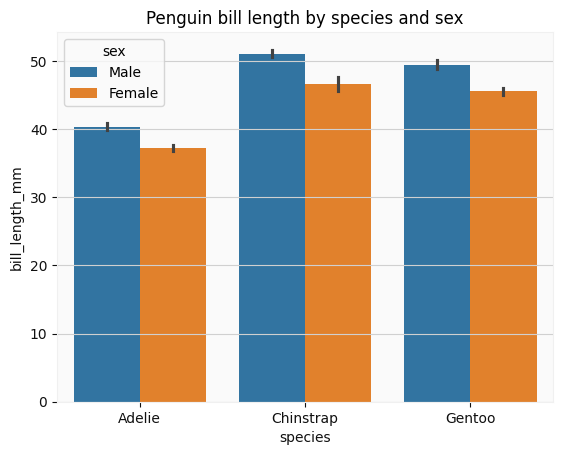

In [ ]:
# Creating a grouped bar chart
sns.barplot(data=penguins, x='species', y='bill_length_mm', hue='sex')
plt.title('Penguin bill length by species and sex')
plt.show()


/tmp/ipython-input-2301008461.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



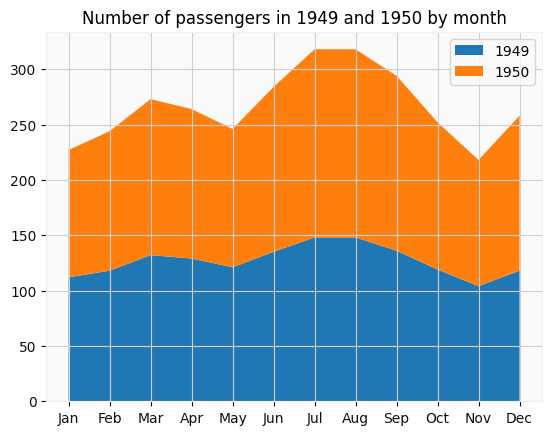

In [ ]:
# Data preparation
flights_grouped = flights.groupby(['year', 'month']).mean().reset_index()
flights_49_50 = pd.DataFrame(list(zip(flights_grouped.loc[:11, 'month'].tolist(), flights_grouped.loc[:11, 'passengers'].tolist(), flights_grouped.loc[12:23, 'passengers'].tolist())), columns=['month', '1949', '1950'])
plt.stackplot(flights_49_50['month'], flights_49_50['1949'], flights_49_50['1950'], labels=['1949', '1950'])
plt.title('Number of passengers in 1949 and 1950 by month')
plt.legend()
plt.show()


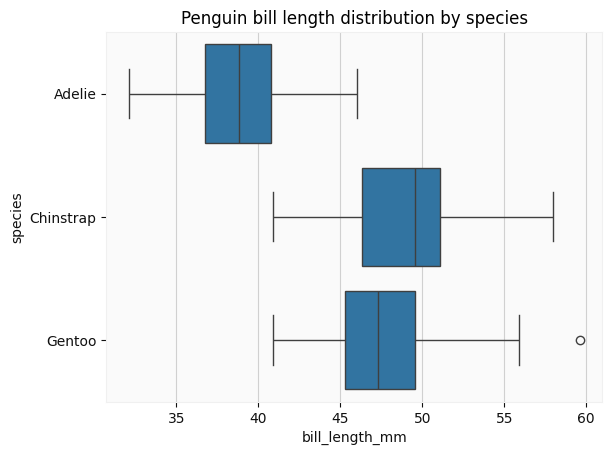

In [ ]:
# Creating multiple box plots
sns.boxplot(data=penguins, x='bill_length_mm', y='species')
plt.title('Penguin bill length distribution by species')
plt.show()


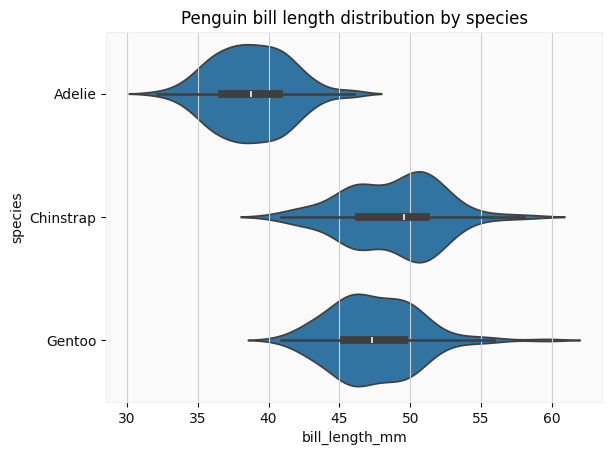

In [ ]:
#Creating a violin plot
sns.violinplot(data=penguins, x='bill_length_mm', y='species')
plt.title('Penguin bill length distribution by species')
plt.show()


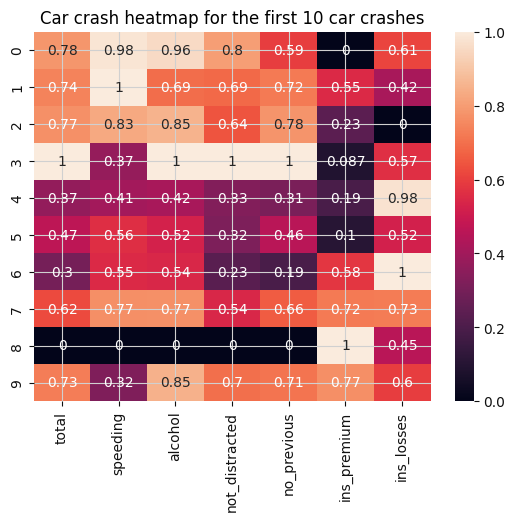

In [ ]:
# Data preparation
from sklearn import preprocessing
car_crashes_cleaned = car_crashes.drop(labels='abbrev', axis=1).iloc[0:10]
min_max_scaler = preprocessing.MinMaxScaler()
car_crashes_normalized = pd.DataFrame(min_max_scaler.fit_transform(car_crashes_cleaned.values), columns=car_crashes_cleaned.columns)
sns.heatmap(car_crashes_normalized, annot=True)
plt.title('Car crash heatmap for the first 10 car crashes')
plt.show()


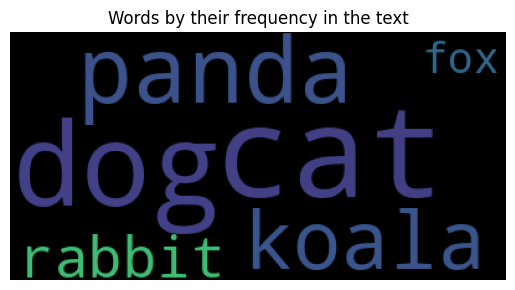

In [ ]:
from wordcloud import WordCloud, STOPWORDS
text = 'cat cat cat cat cat cat dog dog dog dog dog panda panda panda panda koala koala koala rabbit rabbit fox'
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.title('Words by their frequency in the text')
plt.axis('off')
plt.show()


---



Caso 1 : Inventamos DF


In [ ]:
# Instalar bibliotecas
!pip install plotly --quiet

In [ ]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px # Graficos interactivos Ideal para el analisis exploratorio de datos
import pandas as pd

In [ ]:
# Creamos datos para los ejemplos
np.random.seed(42) #Generamos una semilla aleatoria que arranca en el numero 42
regiones = ['Norte', 'Sur', 'Este', 'Oeste'] # 4 regiones en forma de lista
ventas = np.random.randint(50, 200, size=4) # genera una lista de numeros aleatorios --> (Numero minimo, Numero Maximo, largo de la lista)
categorias = ['Electrónicos', 'Ropa', 'Alimentos', 'Hogar'] # 4 categorias en forma de lista

# Generamos una base de datos
datos_series = pd.DataFrame({
    # Generamo la columna mes, que arranca en la fecha que le digamos con periodo de 12 (mensual), frencuencia ME mensual
    'Mes': pd.date_range(start='2024-01-01', periods=12, freq='ME'),
    'Ventas': np.random.randint(100, 500, size=12) #Nuevamente generammos lista de ventas en ese rango aleatorio
})

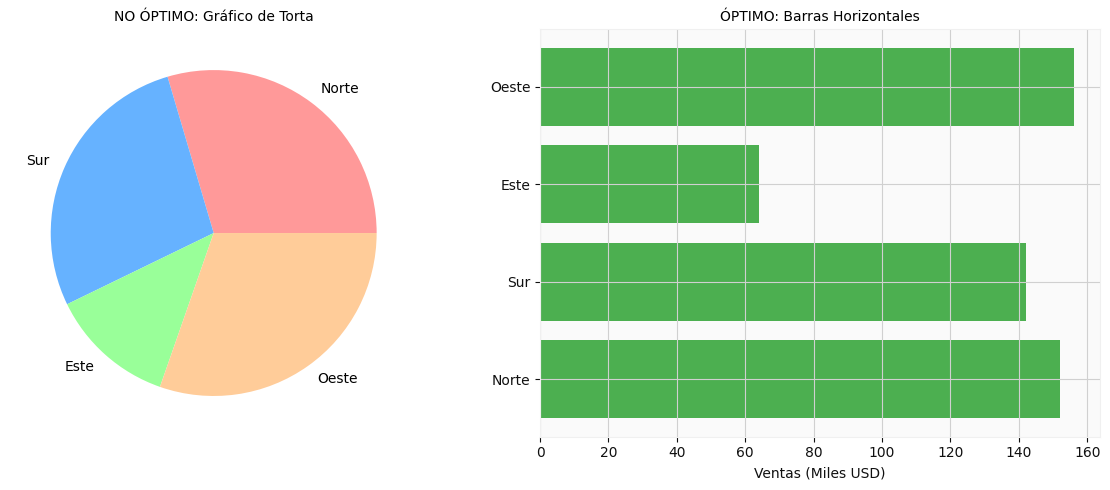

In [ ]:
# ----------------------------
# 1. Gráfico de Torta vs. Barras
# ----------------------------
# No óptimo: Gráfico de torta con muchas categorías
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(ventas, labels=regiones, colors=['#FF9999','#66B2FF','#99FF99','#FFCC99'])
plt.title('NO ÓPTIMO: Gráfico de Torta', fontsize=10)

# Óptimo: Gráfico de barras horizontales
plt.subplot(1, 2, 2)
plt.barh(regiones, ventas, color='#4CAF50')
plt.title('ÓPTIMO: Barras Horizontales', fontsize=10)
plt.xlabel('Ventas (Miles USD)')
plt.tight_layout()
plt.show()

### ¿Por qué el Gráfico de Barras suele ser mejor que el Gráfico de Torta?

Aunque el gráfico de torta es popular, a menudo el gráfico de barras es una mejor opción para visualizar datos, especialmente cuando hay más de unas pocas categorías. Aquí te explicamos por qué:

1.  **Comparación de Proporciones:** Es mucho más fácil para el ojo humano comparar longitudes (barras) que áreas o ángulos (sectores de torta). Cuando tienes varias categorías, distinguir las diferencias sutiles de tamaño en un gráfico de torta se vuelve muy difícil.
2.  **Manejo de Múltiples Categorías:** Los gráficos de torta se saturan y se vuelven ilegibles rápidamente a medida que aumenta el número de categorías. Un gráfico de barras puede manejar muchas más categorías de forma clara.
3.  **Visualización de Valores Exactos:** En un gráfico de barras, la longitud de cada barra representa claramente el valor asociado a la categoría, lo que facilita la lectura de los valores exactos o aproximados. En un gráfico de torta, a menudo necesitas etiquetas de porcentaje para entender las proporciones, y aún así, comparar valores sin etiquetas es difícil.



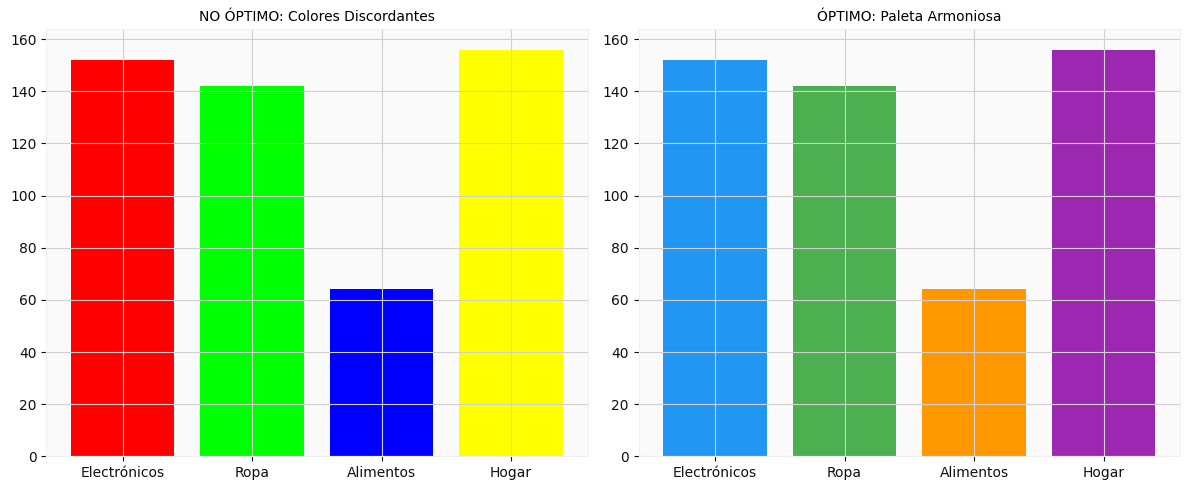

In [ ]:
# ----------------------------
# 2. Uso de Colores
# ----------------------------
# No óptimo: Colores aleatorios
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(categorias, ventas, color=['#FF0000','#00FF00','#0000FF','#FFFF00'])
plt.title('NO ÓPTIMO: Colores Discordantes', fontsize=10)

# Óptimo: Paleta coherente
plt.subplot(1, 2, 2)
plt.bar(categorias, ventas, color=['#2196F3','#4CAF50','#FF9800','#9C27B0'])
plt.title('ÓPTIMO: Paleta Armoniosa', fontsize=10)
plt.tight_layout()
plt.show()

### La Importancia de una Paleta de Colores Adecuada

Utilizar una paleta de colores coherente y bien elegida en tus gráficos es crucial por varias razones sencillas:

1.  **Claridad y Comprensión:** Los colores ayudan a diferenciar elementos en el gráfico (como categorías o series de datos). Una buena paleta facilita que la audiencia distinga rápidamente entre ellos, mejorando la comprensión general.
2.  **Evitar Confusión:** Colores discordantes o demasiado similares pueden confundir al espectador y dificultar la identificación de patrones o tendencias. Una paleta armoniosa guía la vista de forma lógica.
3.  **Accesibilidad:** Considerar a personas con daltonismo es fundamental. Usar paletas de colores inclusivas asegura que la información sea accesible para una mayor audiencia.
4.  **Profesionalismo:** Una selección de colores cuidada da una apariencia más profesional y pulida al gráfico, lo que puede aumentar la credibilidad de tu presentación o análisis.


In [ ]:
# ----------------------------
# 3. Gráfico 3D vs. 2D
# ----------------------------
# No óptimo: Gráfico 3D confuso (usando Plotly)
fig_malo = px.scatter_3d(
    datos_series, x='Mes', y='Ventas', z=np.random.randn(12),
    title='NO ÓPTIMO: Gráfico 3D Innecesario'
)
fig_malo.update_layout(scene=dict(zaxis=dict(showticklabels=False)))
fig_malo.show()

# Óptimo: Gráfico de líneas 2D
fig_bueno = px.line(
    datos_series, x='Mes', y='Ventas',
    title='ÓPTIMO: Tendencia Clara',
    markers=True, line_shape='spline'
)
fig_bueno.update_layout(showlegend=False)
fig_bueno.show()

---

### Gráficos 3D vs. 2D: El Trade-off

La elección entre un gráfico 3D y uno 2D implica un compromiso entre la **claridad y la capacidad de representar múltiples dimensiones**.

**Gráficos 2D:**

*   **Ventajas:** Son generally fáciles de leer, permiten comparaciones directas y son menos propensos a distorsiones visuales. Ideales para mostrar la relación entre dos variables.
*   **Desventajas:** Limitados a mostrar principalmente dos dimensiones de datos de forma intuitiva.

**Gráficos 3D:**

*   **Ventajas:** Pueden ser visualmente atractivos y, en teoría, mostrar la relación entre tres variables simultáneamente.
*   **Desventajas:** A menudo difíciles de interpretar con precisión debido a la perspectiva y la oclusión. Es complicado leer valores exactos y pueden confundir al espectador.

**El Trade-off:**

El principal sacrificio al usar gráficos 3D es la **pérdida de claridad y precisión** en la lectura de datos en comparación con los gráficos 2D. Aunque pueden mostrar más dimensiones, la dificultad para interpretar con exactitud los valores y las relaciones a menudo supera el beneficio.

**Conclusión:**

Para la mayoría de los análisis y presentaciones de datos, los gráficos 2D son la opción preferible por su claridad y facilidad de interpretación. Los gráficos 3D deben usarse con precaución y solo cuando la naturaleza tridimensional de los datos es fundamental para la comprensión y se pueden usar herramientas interactivas para ayudar a la interpretación.

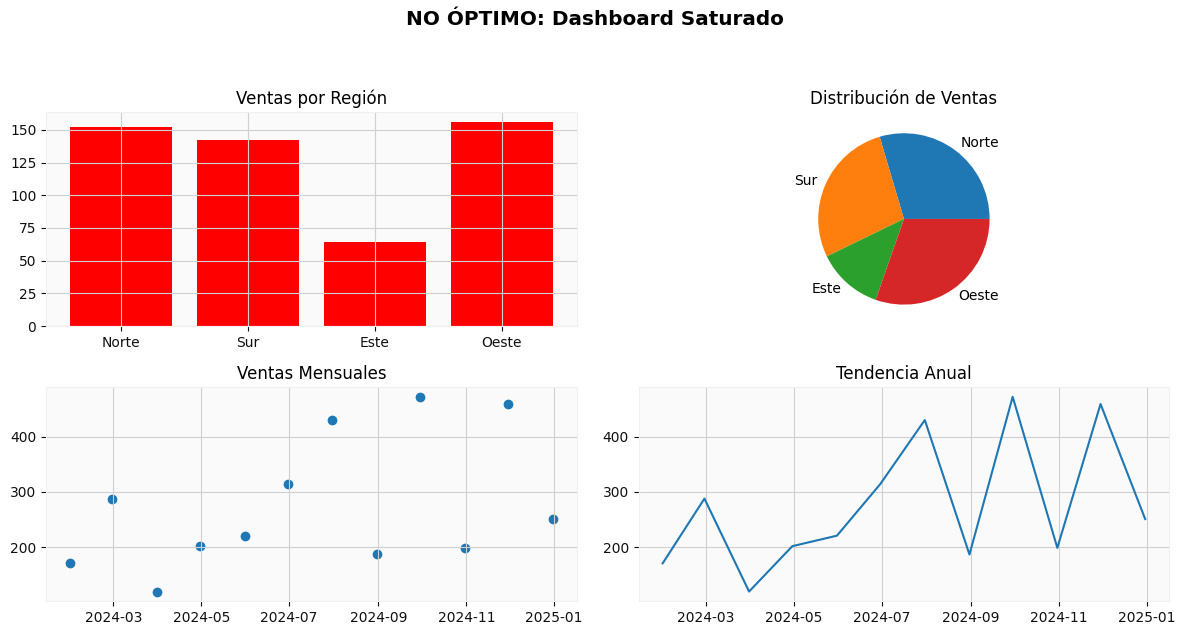

In [ ]:
# ----------------------------
# 4. Dashboard Saturado vs. Minimalista
# ----------------------------
# No óptimo: Demasiados elementos
plt.figure(figsize=(12, 6)) # Tamaño de la figura
plt.subplot(2, 2, 1) # (numero de filas de la cuadricula, numero de columna, por donde comienza)
#grafigo 1
plt.bar(regiones, ventas, color='red')
plt.title('Ventas por Región')

plt.subplot(2, 2, 2)
#grafico 2
plt.pie(ventas, labels=regiones)
plt.title('Distribución de Ventas')

plt.subplot(2, 2, 3)

plt.scatter(datos_series['Mes'], datos_series['Ventas'])
plt.title('Ventas Mensuales')

plt.subplot(2, 2, 4)

plt.plot(datos_series['Mes'], datos_series['Ventas'])
plt.title('Tendencia Anual')
plt.suptitle('NO ÓPTIMO: Dashboard Saturado', y=1.05)
plt.tight_layout()
plt.show()



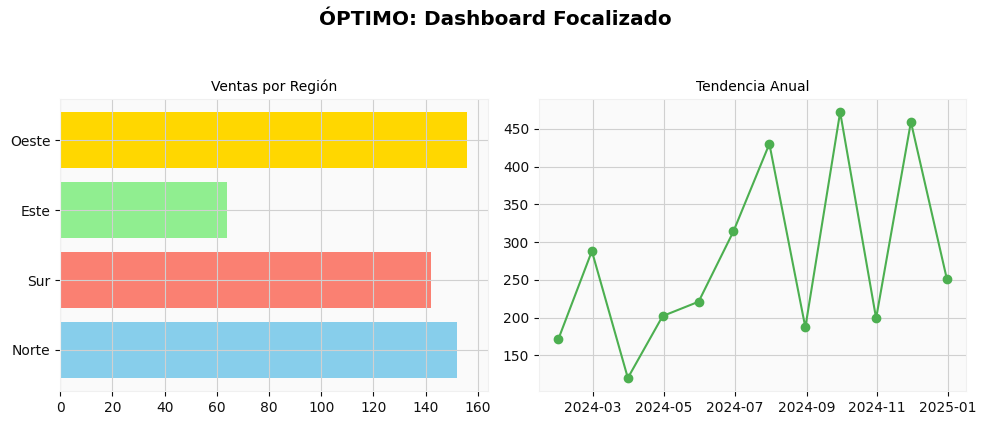

In [ ]:
# Óptimo: Dashboard minimalista
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.barh(regiones, ventas, color=['skyblue', 'salmon', 'lightgreen', 'gold']) #podemos poner los colores en ingles, no hace falta poner los codigos
plt.title('Ventas por Región', fontsize=10)
plt.subplot(1, 2, 2)
plt.plot(datos_series['Mes'], datos_series['Ventas'], marker='o', color='#4CAF50')
plt.title('Tendencia Anual', fontsize=10)
plt.suptitle('ÓPTIMO: Dashboard Focalizado', y=1.05)
plt.tight_layout()
plt.show()

### Dashboard Saturado vs. Dashboard Focalizado: Una Diferencia Clave

La distinción fundamental entre un dashboard **saturado** y uno **focalizado** reside en la **efectividad de la comunicación y la facilidad de interpretación**.

*   **Dashboard Saturado (No Óptimo):** Este tipo de dashboard intenta incluir la mayor cantidad posible de gráficos e indicadores en un solo espacio. El resultado es a menudo una visualización abarrotada y confusa, donde el exceso de información compite por la atención del usuario. Dificulta la identificación rápida de tendencias clave, patrones o anomalías, y puede generar una sensación de abrumamiento. La lectura de los gráficos individuales puede verse comprometida por el poco espacio disponible.

*   **Dashboard Focalizado (Óptimo):** En contraste, un dashboard focalizado es selectivo y estratégico. Se concentra en presentar solo los gráficos e indicadores más relevantes para un objetivo específico o una audiencia determinada. La información se organiza de manera clara y concisa, permitiendo que el usuario capte rápidamente los insights importantes. Los gráficos tienen espacio suficiente para ser leídos e interpretados fácilmente, y la narrativa visual es coherente y dirigida.



---

Dashboard estratégico

In [ ]:
# Instalar bibliotecas
!pip install panel ipywidgets --quiet # Permite crear dashboards y aplicaciones web interactivas a partir de tus análisis de datos.
!panel extension install --sys-precopy --quiet #  Proporciona elementos interactivos (widgets) para controlar y hacer interactivos tus notebooks.
!pip install jupyter_bokeh --quiet # Permite que las visualizaciones de Bokeh se muestren correctamente en entornos de Jupyter (como Colab).

usage: panel [-h] [-v]
             {build,info,init,json,secret,static,bundle,compile,convert,oauth-secret,serve}
             ...
panel: error: argument {build,info,init,json,secret,static,bundle,compile,convert,oauth-secret,serve}: invalid choice: 'extension' (choose from build, info, init, json, secret, static, bundle, compile, convert, oauth-secret, serve)


In [ ]:
#importamos bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import panel as pn
pn.extension('plotly') # para crear paneles de control interactivos y visualizaciones usando gráficos de Plotly cuando se trabaja con Panel.


In [ ]:
# simulamos datos para el ejemplo
np.random.seed(42)
data = {
    'Fecha': pd.date_range('2024-04-01', periods=365, freq='D'),
    'Region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], 365),
    'Producto': np.random.choice(['Electrónicos', 'Ropa', 'Alimentos'], 365),
    'Ventas': np.random.randint(100, 5000, 365)
}
df = pd.DataFrame(data)
df

,Fecha,Region,Producto,Ventas
0,2024-04-01,Este,Alimentos,1291
1,2024-04-02,Oeste,Ropa,3093
2,2024-04-03,Norte,Ropa,2781
3,2024-04-04,Este,Alimentos,1317
4,2024-04-05,Este,Alimentos,1640
...,...,...,...,...
360,2025-03-27,Oeste,Electrónicos,2721
361,2025-03-28,Norte,Electrónicos,4327
362,2025-03-29,Norte,Ropa,700
363,2025-03-30,Sur,Alimentos,1165


ESTAS SIGUIENTES DOS CELDAS SON MUY IMPORTANTES!

In [ ]:
# tiene valores nulos? --> Si son dataframes creados con np.ramdomseed no van a haber valores nulos, en una base real lo mas probable es que si
df.isna().sum()
#si hay valores nulos en alguna fila, dropeamos la fila con
#df.dropna(subset=['nombre_de_columna'], inplace=True)
#si queremos borrar todos los nulos df.dropna(inplace=True)


,0
Fecha,0
Region,0
Producto,0
Ventas,0


In [ ]:
#Breve descripccion de la base
df.describe()

,Fecha,Ventas
count,365,365.000000
mean,2024-09-30 00:00:00,2614.186301
min,2024-04-01 00:00:00,103.000000
25%,2024-07-01 00:00:00,1442.000000
50%,2024-09-30 00:00:00,2582.000000
75%,2024-12-30 00:00:00,3813.000000
max,2025-03-31 00:00:00,4992.000000
std,NaN,1414.968205


In [ ]:
 #armamos la función para generar el dashboard y la ejecutamos
def dashboard_estrategico():
    # KPIs
    total_ventas = df['Ventas'].sum()
    margen = total_ventas * 0.25 #del total de ventas nos quedamos con el 25%
    #Crecimiento anual = ((ventas de diciembre-ventas de enero)/ventas de enero)*100
    crecimiento = ((df[df['Fecha'].dt.month == 12]['Ventas'].sum() -
                  df[df['Fecha'].dt.month == 1]['Ventas'].sum()) /
                  df[df['Fecha'].dt.month == 1]['Ventas'].sum()) * 100

    # Gráficos
    fig1 = px.line(df.groupby(df['Fecha'].dt.month)['Ventas'].sum().reset_index(),
                  x='Fecha', y='Ventas', title='Ventas Mensuales 2024')
    fig2 = px.treemap(df, path=['Region', 'Producto'], values='Ventas',
                     title='Ventas por Región/Producto')

    # Layout,
    return pn.Column(
        pn.Row(
            pn.indicators.Number(value=total_ventas, name='Ventas Totales', format='${value:,.0f}'),
            pn.indicators.Number(value=margen, name='Margen Bruto', format='${value:,.0f}'),
            pn.indicators.Number(value=crecimiento, name='Crecimiento Anual', format='{value:,.1f}%')
        ),
        pn.Row(fig1, fig2)
    ).servable()

dashboard_estrategico()

Column
    [0] Row
        [0] Number(format='${value:,.0f}', name='Ventas Totales', value=np.int64(954178))
        [1] Number(format='${value:,.0f}', name='Margen Bruto', value=np.float64(238544.5))
        [2] Number(format='{value:,.1f}%', name='Crecimiento Anual', value=np.float64(13.665498936804...)
    [1] Row
        [0] Plotly(Figure)
        [1] Plotly(Figure)

---

Caso 2: Dashboard financieros

In [ ]:
# Instalar bibliotecas
!pip install yfinance mplfinance --quiet
!pip install numpy_financial --quiet

In [ ]:
# Importar bibliotecas necesarias
import numpy_financial as nf
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf # Esta biblioteca está diseñada específicamente para crear gráficos financieros (como gráficos de velas o OHLC) utilizando Matplotlib.
from datetime import datetime, timedelta # trabajar con fechas y horas, timedelta representa una duración, la diferencia entre dos fechas o horas
import pandas as pd

In [ ]:
# Configuramos parámetros
ticker = "AAPL"
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Descargamos y reestructuramos los datos
dataa = yf.download(ticker, start=start_date, end=end_date, progress=False)

# Aplanamos las columnas multi-nivel
dataa.columns = dataa.columns.droplevel(1)  # Eliminar el nivel del ticker
dataa = dataa.rename(columns={
    'Close': 'Close',
    'High': 'High',
    'Low': 'Low',
    'Open': 'Open',
    'Volume': 'Volume'
})[['Open', 'High', 'Low', 'Close', 'Volume']]  # Orden estándar para mplfinance

# Verificamos la estructura final
print("Estructura corregida:")
print(dataa)

/tmp/ipython-input-3482312491.py:7: FutureWarning:

YF.download() has changed argument auto_adjust default to True



Estructura corregida:
Price             Open        High         Low       Close     Volume
Date                                                                 
2020-11-09  117.414719  118.866567  113.078660  113.341743  154515300
2020-11-10  112.591473  114.579234  111.207824  113.000717  138023400
2020-11-11  114.189474  116.566995  113.458677  116.430580  112295000
2020-11-12  116.557259  117.443955  115.534140  116.157753  103162300
2020-11-13  116.381843  116.605950  114.852042  116.206451   81581900
...                ...         ...         ...         ...        ...
2025-10-30  271.989990  274.140015  268.480011  271.399994   69886500
2025-10-31  276.989990  277.320007  269.160004  270.369995   86167100
2025-11-03  270.420013  270.850006  266.250000  269.049988   50194600
2025-11-04  268.329987  271.489990  267.619995  270.040009   49274800
2025-11-07  269.795013  272.290009  267.269989  268.459991   24839978

[1254 rows x 5 columns]


/usr/local/lib/python3.12/dist-packages/mplfinance/_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




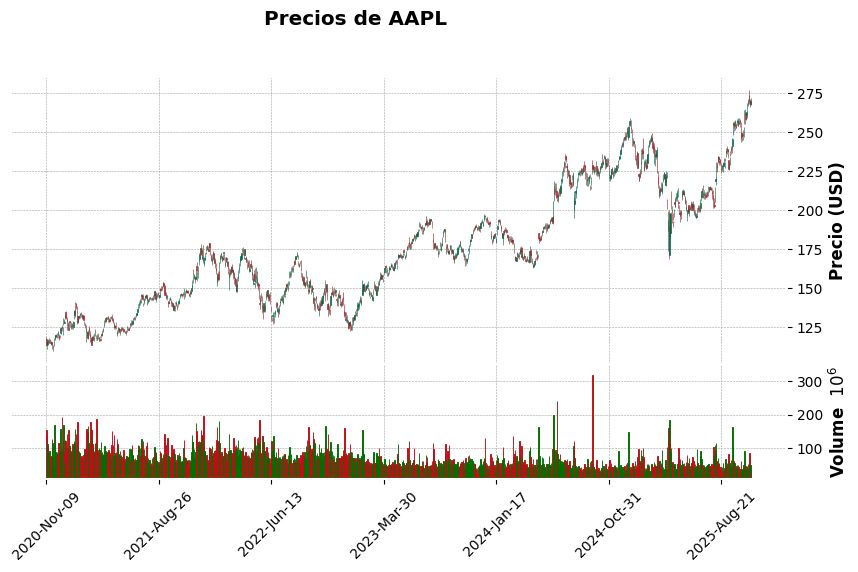

In [ ]:
# Creamos gráfico de velas con la libreria mplfinance
mpf.plot(dataa, # INFO
         type='candle',#velas
         style='charles', #estilo
         volume=True, # grafico el volumen? si
         title=f'Precios de {ticker}',
         ylabel='Precio (USD)',
         figratio=(15, 8))

si disminuimos los dias las velas se ven mejor

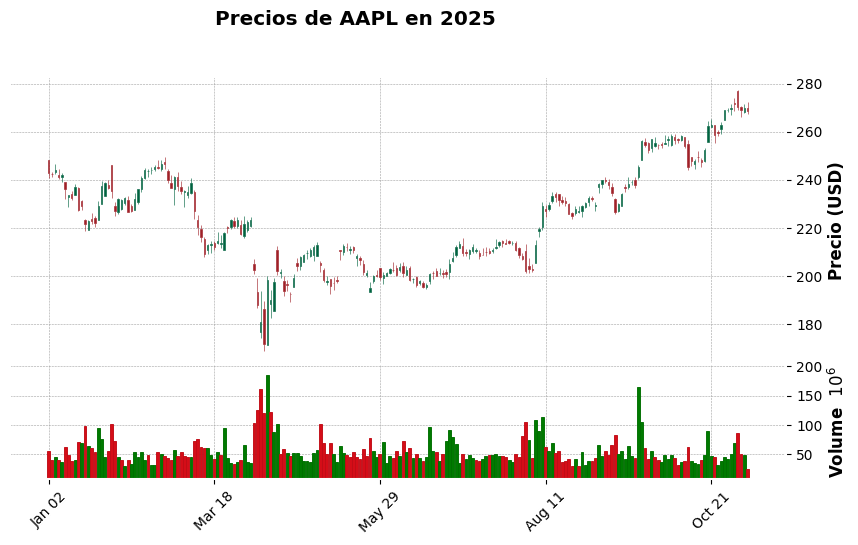

In [ ]:
# Filtramos los datos para el año 2025
data_2025 = dataa[dataa.index.year == 2025] #dataa.index.month-year-day-dayofweek permite acceder a las fechas directamente

# se Puede filtrar el DataFrame usando rangos de fechas o fechas específicas (dataa['2020-01-01':'2020-01-31']

# Creamos gráfico de velas con los datos de 2025
mpf.plot(data_2025,
         type='candle',
         style='charles',
         volume=True,
         title=f'Precios de {ticker} en 2025',
         ylabel='Precio (USD)',
         figratio=(15, 8))

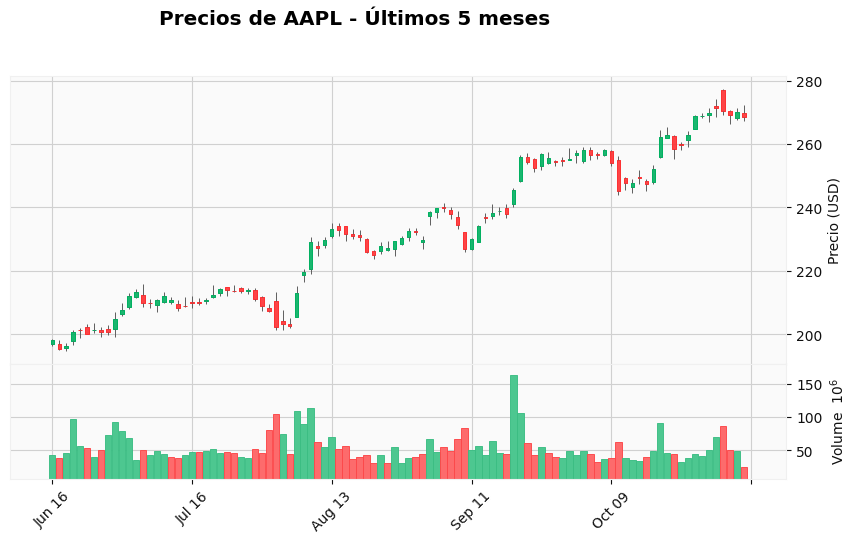

In [ ]:
# Seleccionamos los últimos 5 meses de datos (aproximadamente 5 * 30 días)
data_last_5_months = dataa.iloc[-5*20:] # Usamos 20 días por mes hábil aproximadamente
#-5*20: Calcula el número de filas hacia atrás desde el final del DataFrame. En este caso, 5 * 20 = 100, por lo que -100 significa la fila número 100 contando desde el final.
#: Después de los corchetes y el primer valor, el : indica que quieres seleccionar todas las filas desde la posición especificada hasta el final del DataFrame.
# Creamos gráfico de velas con los datos de los últimos 5 meses
mpf.plot(data_last_5_months,
         type='candle',
         style='yahoo',
         volume=True,
         title=f'Precios de {ticker} - Últimos 5 meses',
         ylabel='Precio (USD)',
         figratio=(15, 8))

In [ ]:
# Configurar parámetros
ticker = "AAPL"
end_date = datetime.today() + timedelta(days=1)  # Incluir hoy
start_date = end_date - timedelta(days=60)


#en la clase 17 hay una manera mas sencilla, aqui les enseño otro camino

# Descargar datos
data = yf.download(ticker, start=start_date, end=end_date, progress=False)

# Aplanar columnas multi-index
data.columns = data.columns.droplevel(1) if isinstance(data.columns, pd.MultiIndex) else data.columns
#data.columns accede a las etiquetas de las columnas (a menudo fechas para extraer mes/año), y la línea con droplevel simplifica los nombres de las columnas eliminando un nivel jerárquico si el DataFrame lo tiene.
# Si el DataFrame tiene columnas con varios niveles (MultiIndex),
# se elimina el segundo nivel para dejar solo los nombres principales de las columnas.
# Si no tiene MultiIndex, simplemente se mantienen las columnas tal como están.


/tmp/ipython-input-1555207000.py:10: FutureWarning:

YF.download() has changed argument auto_adjust default to True



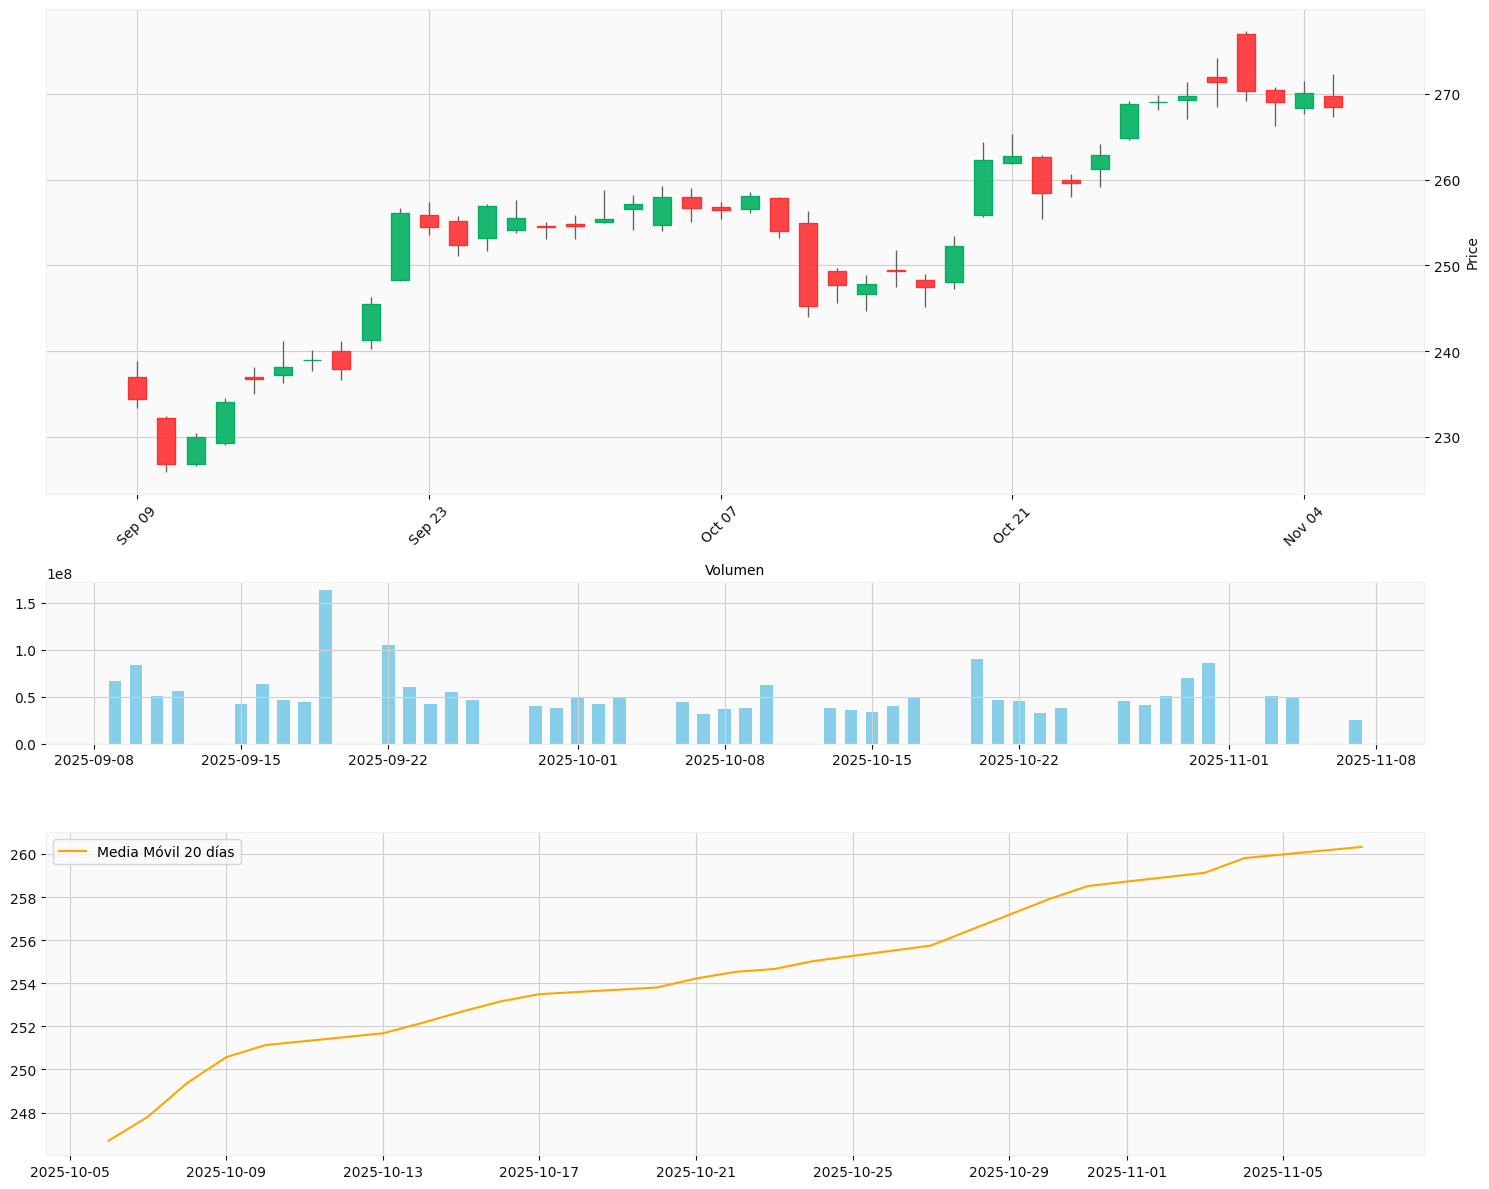

In [ ]:
# Configurar figura
fig, axs = plt.subplots(3, 1, figsize=(15, 12),
                        #Controla la altura del grafico
                        #[3, 1, 2]: Esta es la clave importante. Indica que la primera fila (donde irá axs[0]) tendrá una altura relativa de 3 unidades,
                        #la segunda fila (axs[1]) tendrá una altura relativa de 1 unidad, y la tercera fila (axs[2]) tendrá una altura relativa de 2 unidades.
                        gridspec_kw={'height_ratios': [3, 1, 2]})

# ---- Gráfico 1: Velas japonesas ----
mpf.plot(data, type='candle',
         #Hay muchas mas facheras, como binance, ibd, classic, japan
         style='yahoo', ax=axs[0], volume=False, show_nontrading=False)

# ---- Gráfico 2: Volumen ----
axs[1].bar(data.index, data['Volume'], color='skyblue', width=0.6)
axs[1].set_title('Volumen', fontsize=10)

# ---- Gráfico 3: Media móvil ----
#Le decimos que saque la media de a 20 dias
data['MA20'] = data['Close'].rolling(20).mean() #Del dataframe agarre close y agarra un intervalo de 20 dias (rolling(20))
axs[2].plot(data.index, data['MA20'], label='Media Móvil 20 días', color='orange')
axs[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
#Nos quedamos con el cierre de la fecha
data_close = dataa[['Close']]
display(data_close.head())

Price,Close
Date,
2020-11-09,113.341743
2020-11-10,113.000717
2020-11-11,116.430580
2020-11-12,116.157753
2020-11-13,116.206451


In [ ]:
dataa['Year'] = dataa.index.year
df_PROMAÑO = dataa.groupby(dataa.index.month)['Close'].mean().reset_index() # IMPORTANTE RESETEAR EL INDICE PARA QUE QUEDE PROLIJO! les servira despues para entrenamiento de Machine learning

df_PROMAÑO.columns = ['mes', 'Promedio de Cierre de Acción']
display(df_PROMAÑO)

,mes,Promedio de Cierre de Acción
0,1,170.557069
1,2,173.159093
2,3,164.385123
3,4,164.977191
4,5,166.452756
5,6,169.059187
6,7,183.651935
7,8,186.115022
8,9,187.033262
9,10,190.941157


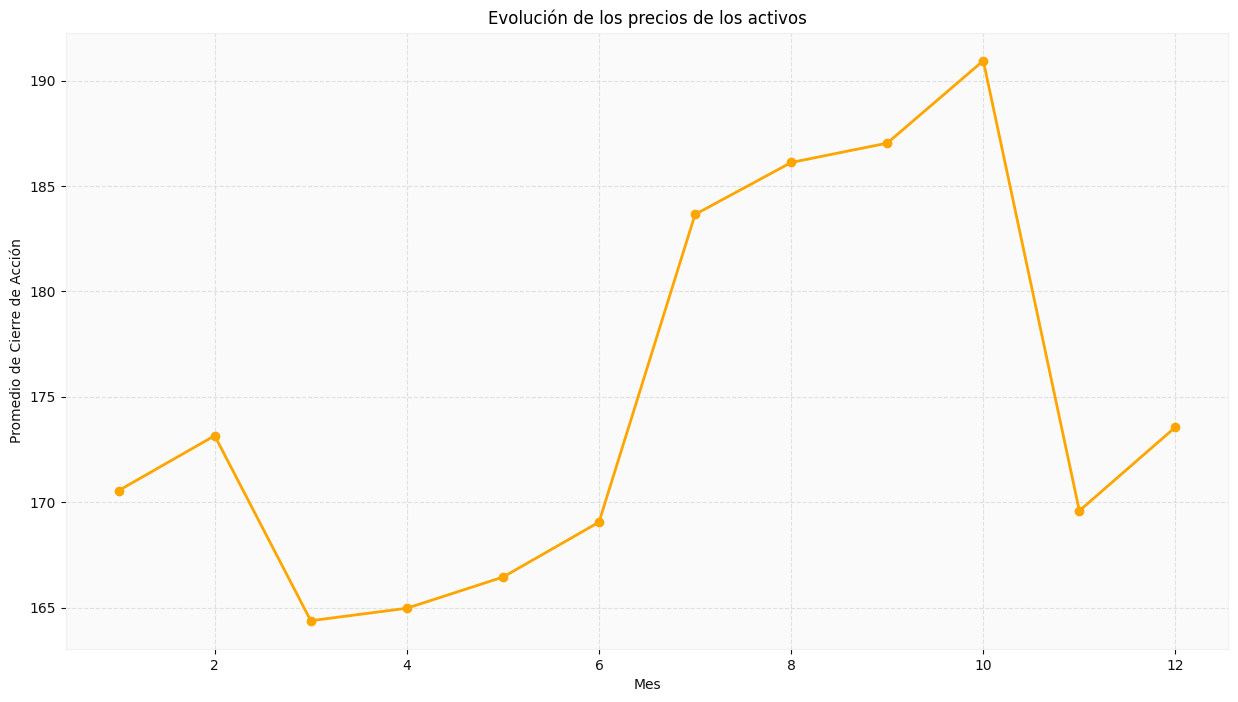

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(
    df_PROMAÑO['mes'],                      # eje x → meses
    df_PROMAÑO['Promedio de Cierre de Acción'],  # eje y → precios
    color='orange', linewidth=2, marker='o'      # estilo opcional
)
plt.title('Evolución de los precios de los activos')
plt.xlabel('Mes')
plt.ylabel('Promedio de Cierre de Acción')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Atencion para el manejo de dataframes!

* ``loc`` se usa para la selección basada en etiquetas (nombres). Necesitas pasarle los nombres de las filas y/o columnas que quieres seleccionar. Puede aceptar booleanos o listas de etiquetas.
* ``iloc``se usa para la selección basada en la posición entera (índice numérico). Necesitas pasarle los índices numéricos de las filas y/o columnas, similar a cómo se trabaja con listas de Python. No considera los nombres de las etiquetas, solo su posición.

In [ ]:
# Copiamos el DataFrame (opcional)
df_modificado = df_PROMAÑO.copy()

# Multiplicar toda la columna por 10, 10 son las acciones que vamos a comprar
df_modificado['Promedio de Cierre de Acción'] *= 10

# Luego ajustar solo la primera fila (índice 0) multiplicándola por -1 adicional
df_modificado.loc[0, 'Promedio de Cierre de Acción'] *= -1
display(df_modificado)


,mes,Promedio de Cierre de Acción
0,1,-1705.570694
1,2,1731.590928
2,3,1643.851233
3,4,1649.771911
4,5,1664.527558
5,6,1690.591870
6,7,1836.519345
7,8,1861.150216
8,9,1870.332624
9,10,1909.411573


In [ ]:
# Renombrar la columna
df_modificado.rename(columns={'Promedio de Cierre de Acción': 'Flujo'}, inplace=True)
display(df_modificado)


,mes,Flujo
0,1,-1705.570694
1,2,1731.590928
2,3,1643.851233
3,4,1649.771911
4,5,1664.527558
5,6,1690.591870
6,7,1836.519345
7,8,1861.150216
8,9,1870.332624
9,10,1909.411573


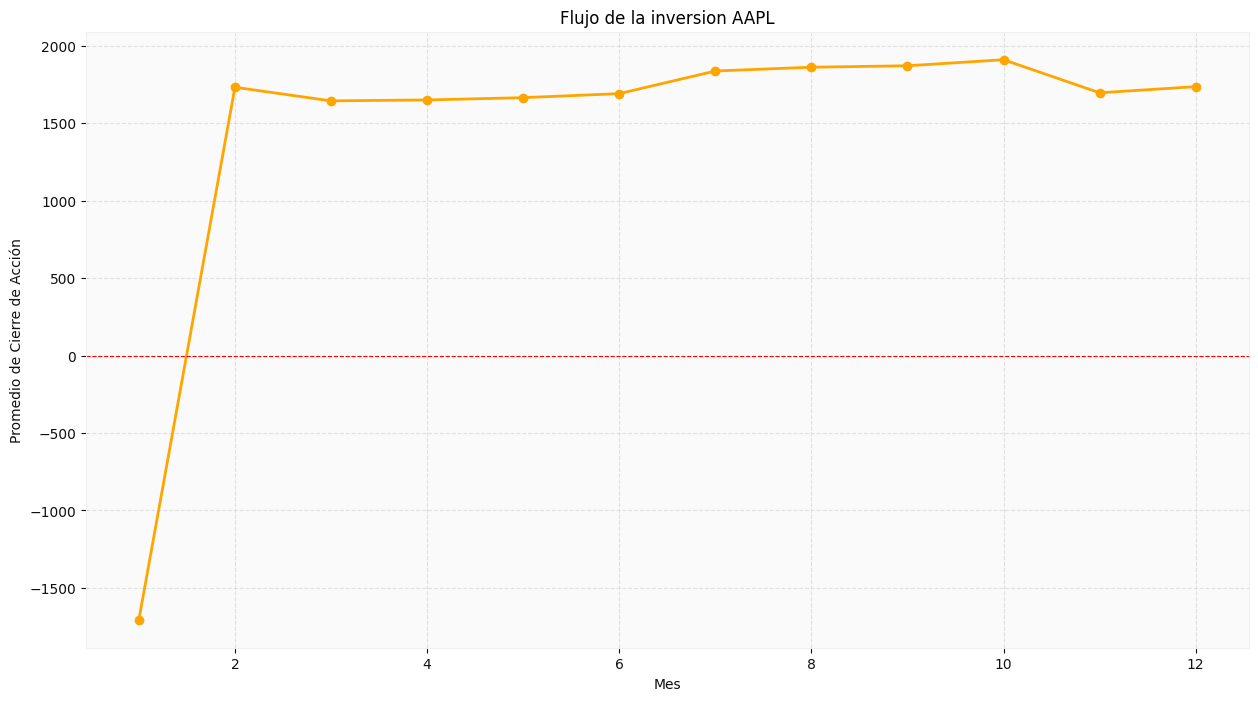

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(
    df_modificado['mes'],                      # eje x → meses
    df_modificado['Flujo'],  # eje y → precios
    color='orange', linewidth=2, marker='o'      # estilo opcional
)
plt.title('Flujo de la inversion AAPL')
plt.xlabel('Mes')
plt.ylabel('Promedio de Cierre de Acción')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Añadir línea punteada en y=0
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

ATENTO A LOS DATOS DEL EJERCICIO SIEMPRE!


* costo de capital - WACC - Tasa de descuento= 9,78%
* Tasa de reinversion = 60%
* Tasa de Financiamiento = 25%

In [ ]:
#Guarden la info del ejercicio en variables luego las consultan en sus respectivas herramientas, se ahorran laburo
rdescuento_ejercicio = 0.0978
rreinversion_ejercicio = 0.60
rfinanciamiento_ejercicio = 0.25

In [ ]:
# Calculamos tir
tir = nf.irr(df_modificado['Flujo'])
print(f"La Tasa Interna de Retorno (TIR) es: {tir:.2%}")

tirm_result = nf.mirr(df_modificado['Flujo'].tolist(), rfinanciamiento_ejercicio, rreinversion_ejercicio) # (FLUJO, TASA DE FINANCIAMIENTO,  TASA DE REINVERSION)
print(f"La Tasa interna de Retorno Modificada es : {tirm_result:.2%}")

van= nf.npv(rdescuento_ejercicio, df_modificado['Flujo'])
print(f"El Valor Actual Neto (VAN) es: {van:.2f}")

La Tasa Interna de Retorno (TIR) es: 99.47%
La Tasa interna de Retorno Modificada es : 67.47%
El Valor Actual Neto (VAN) es: 9706.87


In [ ]:
# Flujo
flujos_ir = df_modificado['Flujo'].tolist()

# Separo Inversion inicial y flujos futuros
I_inicial = abs(flujos_ir[0])

# VAN
van = nf.npv(rdescuento_ejercicio, flujos_ir)
# Indice de rentabilidad
ir = van / I_inicial
print(f"El Índice de Rentabilidad (IR) es: {ir:.2f}")
print(f"Valor actual neto (VAN) ES: {van:.2f}")

El Índice de Rentabilidad (IR) es: 5.69
Valor actual neto (VAN) ES: 9706.87


In [ ]:
#flujos como una df_modificado
flujos_prs = df_modificado['Flujo'].tolist()

#inversión inicial
I_inicial = abs(flujos_prs[0]) #abs es convertir todo a un valor absoluto si es menos 5 entonces sera 5 con abs

# Inicializar variables para el flujo de caja acumulado y el período de recuperación
cumulative_cash_flow = 0 #el flujo de caja acumulativo comienza en 0

# luego , Iterar a través de los flujos de caja comenzando desde el primer período (después de la inversión inicial)
for t in range(1, len(flujos_prs)):
    cumulative_cash_flow += flujos_prs[t]

    # Verificar si el flujo de caja acumulado es mayor o igual a la inversión inicial
    if cumulative_cash_flow >= I_inicial:
        # Si es así, calcular el período de recuperación
        # El período de recuperación es el período actual 't' más la fracción del flujo del último período necesaria para cubrir la inversión restante
        remaining_investment = I_inicial - (cumulative_cash_flow - flujos_prs[t]) #regla de 3 simples
        prs = t - 1 + (remaining_investment / flujos_prs[t])
        break

print(f"El Periodo de Recuperación Simple (PRS) es: {prs:.2f} años")


El Periodo de Recuperación Simple (PRS) es: 0.98 años


In [ ]:
# Definir la tasa de descuento (usando la misma tasa que para VAN/IR)
r_desc_prd = rdescuento_ejercicio

# Obtener los flujos de caja como una lista
flujos_prd = df_modificado['Flujo'].tolist()

# Obtener la inversión inicial (valor absoluto del primer flujo de caja)
I_inicial = abs(flujos_prd[0])

# Misma historia
cumulative_discounted_cash_flow = 0
# Misma historia
for t in range(1, len(flujos_prd)):
    # Descontar el flujo de caja actual
    discounted_flow = flujos_prd[t] / (1 + r_desc_prd)**t # aaaaa pero aca cambia se descuentan los flujos periodo periodo por la tasa de costo de capital.
    cumulative_discounted_cash_flow += discounted_flow

    # Verificar si el flujo de caja descontado acumulado es mayor o igual a la inversión inicial
    if cumulative_discounted_cash_flow >= I_inicial:
        # Si es así, calcular el período de recuperación descontado
        # El período de recuperación descontado es el período actual 't' más la fracción del flujo descontado del último período necesaria para cubrir la inversión restante
        remaining_investment = I_inicial - (cumulative_discounted_cash_flow - discounted_flow)
        prd = t - 1 + (remaining_investment / discounted_flow)
        break
print(f"El Periodo de Recuperación Descontado (PRD) es: {prd:.2f} años")


El Periodo de Recuperación Descontado (PRD) es: 1.09 años


Tasa Interna de Retorno (TIR): 99.47%
Tasa Interna de Retorno Modificada (TIRM): 67.47%


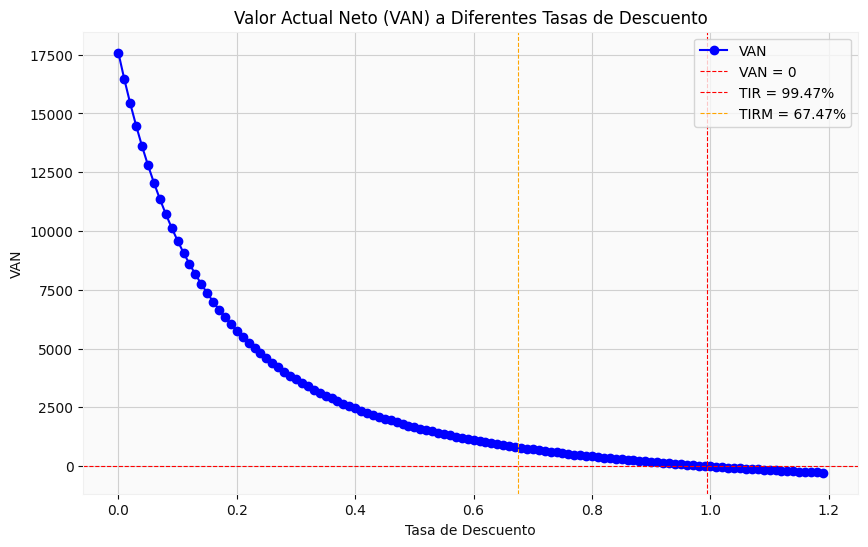

In [ ]:
# --- Definir flujos y tasas ---
flujos = df_modificado['Flujo'].tolist()

rfinanciamiento = rfinanciamiento_ejercicio
rreinversion = rreinversion_ejercicio

# --- Calcular TIR y TIRM ---
tir = nf.irr(flujos)
tirm = nf.mirr(flujos, rfinanciamiento, rreinversion)

print(f"Tasa Interna de Retorno (TIR): {tir:.2%}")
print(f"Tasa Interna de Retorno Modificada (TIRM): {tirm:.2%}")

# --- Crear rango de tasas para VAN ---
tasas_descuento = np.arange(0, max(tir*1.2, 0.5), 0.01) # es muy importante agregar el max porque sino el grafico no encuentra el corte con la tir, queda desescalado.
# --- Calcular VAN para cada tasa ---
van_por_tasa = [nf.npv(tasa, flujos) for tasa in tasas_descuento]

# --- Graficar VAN vs Tasa ---
plt.figure(figsize=(10, 6))
plt.plot(tasas_descuento, van_por_tasa, marker='o', linestyle='-', color='blue', label='VAN')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='VAN = 0')

# Marcar TIR y TIRM en el gráfico
plt.axvline(tir, color='red', linestyle='--', linewidth=0.8, label=f"TIR = {tir:.2%}")
plt.axvline(tirm, color='orange', linestyle='--', linewidth=0.8, label=f"TIRM = {tirm:.2%}")

# --- Etiquetas y formato ---
plt.title('Valor Actual Neto (VAN) a Diferentes Tasas de Descuento')
plt.xlabel('Tasa de Descuento')
plt.ylabel('VAN')
plt.grid(True)
plt.legend()
plt.show()


---

Combinando diferentes visualizaciones

In [ ]:
# Configuramos parámetros
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"] # Lista de tickers de los 4 activos
end_date = datetime.today()
start_date = end_date - timedelta(days=15*365)

# Diccionario para almacenar los DataFrames de cada activo
data_multiple = {}

#Bucle de optencion de datos, notar tickers lo definimos en un principio y ticker esta en la linea 11 del codigo
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)

    # Aplanamos las columnas multi-nivel si existen
    #Verifica si las columnas del DataFrame tienen más de un nivel (es decir, si están organizadas en un MultiIndex,
    #como suele pasar al leer archivos Excel con encabezados en varias filas).
    #sí tienen varios niveles, elimina el segundo nivel con .droplevel(1) para dejar solo los nombres principales.
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.droplevel(1)
        # Asegurarse de que las columnas esperadas estén presentes después de droplevel
        expected_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
        data = data.rename(columns={col: col for col in expected_cols if col in data.columns})[expected_cols]
    else:
         # Si no es MultiIndex, solo renombra y reordena si es necesario
         expected_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
         data = data.rename(columns={col: col for col in expected_cols if col in data.columns})[expected_cols]

    # Almacenar el DataFrame en el diccionario
    data_multiple[ticker] = data

# Verificamos la estructura final para cada ticker
for ticker, df_data in data_multiple.items():
    print(f"\nEstructura de datos para {ticker}:")
    print(df_data.head())
    print(f"Cantidad de filas para {ticker}: {len(df_data)}")

/tmp/ipython-input-2464919360.py:11: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-2464919360.py:11: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-2464919360.py:11: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-2464919360.py:11: FutureWarning:

YF.download() has changed argument auto_adjust default to True




Estructura de datos para AAPL:
Price           Open      High       Low     Close     Volume
Date                                                         
2010-11-11  9.456337  9.558406  9.433822  9.505871  361284000
2010-11-12  9.486357  9.501366  9.115009  9.247096  795846800
2010-11-15  9.260006  9.322448  9.194262  9.217378  403606000
2010-11-16  9.177749  9.234187  8.985620  9.053766  657650000
2010-11-17  9.042058  9.125815  8.938789  9.021045  479449600
Cantidad de filas para AAPL: 3769

Estructura de datos para MSFT:
Price            Open       High        Low      Close    Volume
Date                                                            
2010-11-11  20.267767  20.298153  19.963903  20.267767  62073100
2010-11-12  20.108232  20.146216  19.827158  19.956301  64962200
2010-11-15  20.001887  20.131029  19.880341  19.903131  51794600
2010-11-16  19.903136  19.903136  19.605046  19.727339  65339200
2010-11-17  19.796130  19.803774  19.528615  19.543901  58299700
Cantidad de f

Simulemos un proyecto de inversion, en la compra de activos financieros.

In [ ]:
# Diccionario para almacenar solo las columnas 'Close'
close_prices = {}

# Iterar sobre el diccionario de DataFrames
for ticker, df_data in data_multiple.items():
    # Seleccionar la columna 'Close' para cada ticker
    close_prices[ticker] = df_data['Close']

# Combinar las series de 'Close' en un solo DataFrame
# pandas alineará automáticamente por índice (fecha)
close_prices_df = pd.DataFrame(close_prices)

# Mostrar las primeras filas del nuevo DataFrame
print("DataFrame con solo precios de cierre:")
display(close_prices_df.head())

DataFrame con solo precios de cierre:


,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2010-11-11,9.505871,20.267767,15.339398,8.5185
2010-11-12,9.247096,19.956301,14.993932,8.2840
2010-11-15,9.217378,19.903131,14.799580,7.9450
2010-11-16,9.053766,19.727339,14.507548,7.8890
2010-11-17,9.021045,19.543901,14.503323,7.9175


In [ ]:
# Calcular el promedio del precio de cierre por año
dfcloseperyear = close_prices_df.groupby(close_prices_df.index.year).mean()

# Mostrar el resultado
print("Promedio del precio de cierre por año para cada activo:")
display(dfcloseperyear)

Promedio del precio de cierre por año para cada activo:


,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2010,9.522012,20.521505,14.686259,8.746371
2011,10.927452,20.164305,14.141060,9.833601
2012,17.335041,23.712197,15.976308,11.015182
2013,14.509156,26.640809,21.976622,14.901579
2014,20.306022,35.817591,28.211541,16.627552
2015,26.870706,40.461681,30.787069,23.906915
2016,23.900872,49.180561,37.899266,34.976157
2017,35.048072,65.679345,46.666788,48.408351
2018,44.682010,93.955413,55.717888,82.086309


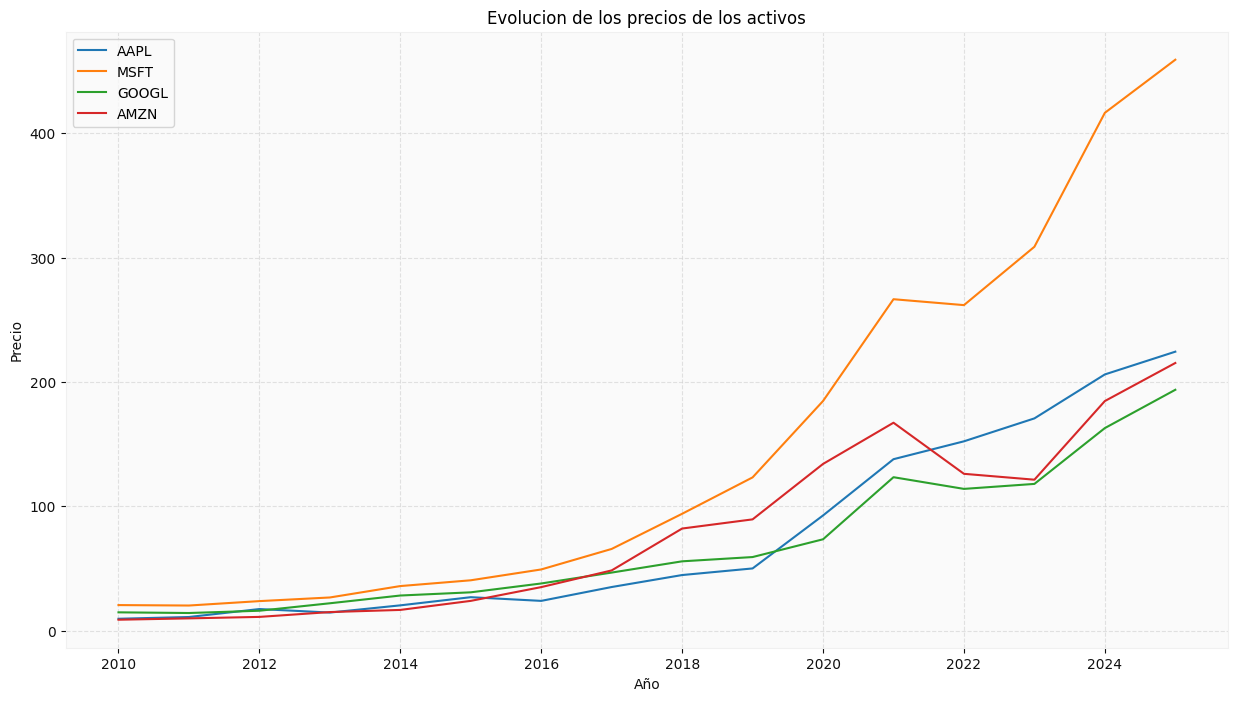

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(dfcloseperyear)
plt.title('Evolucion de los precios de los activos') # Añadir un título para claridad
plt.xlabel('Año') # Añadir etiqueta al eje x
plt.ylabel('Precio') # Añadir etiqueta al eje y
plt.legend(dfcloseperyear.columns) # Añadir leyenda usando los nombres de las columnas
plt.grid(True, linestyle='--', alpha=0.6) # Añadir una cuadrícula suave
plt.show()

In [ ]:
# Seleccionar la primera fila
primera_fila = dfcloseperyear.iloc[0]

# Multiplicar la primera fila por 10
primera_fila_multiplicada = primera_fila * (-10)
display(primera_fila_multiplicada)

,2010
AAPL,-95.220123
MSFT,-205.215054
GOOGL,-146.862595
AMZN,-87.463715


In [ ]:
# Asegurarse de que la primera fila esté multiplicada por -10
# (Esto utiliza el resultado calculado en el paso anterior si no se ha modificado 'primera_fila_multiplicada')
dfcloseperyear.iloc[0] = primera_fila_multiplicada

# Multiplicar todas las filas excepto la primera por 10
dfcloseperyear.iloc[1:] = dfcloseperyear.iloc[1:] * 10
display(dfcloseperyear)

,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2010,-95.220123,-205.215054,-146.862595,-87.463715
2011,109.274522,201.643054,141.410604,98.336012
2012,173.350409,237.121968,159.763083,110.151820
2013,145.091556,266.408091,219.766217,149.015794
2014,203.060225,358.175906,282.115406,166.275516
2015,268.707057,404.616809,307.870694,239.069146
2016,239.008718,491.805609,378.992659,349.761566
2017,350.480721,656.793448,466.667880,484.083506
2018,446.820103,939.554127,557.178879,820.863085


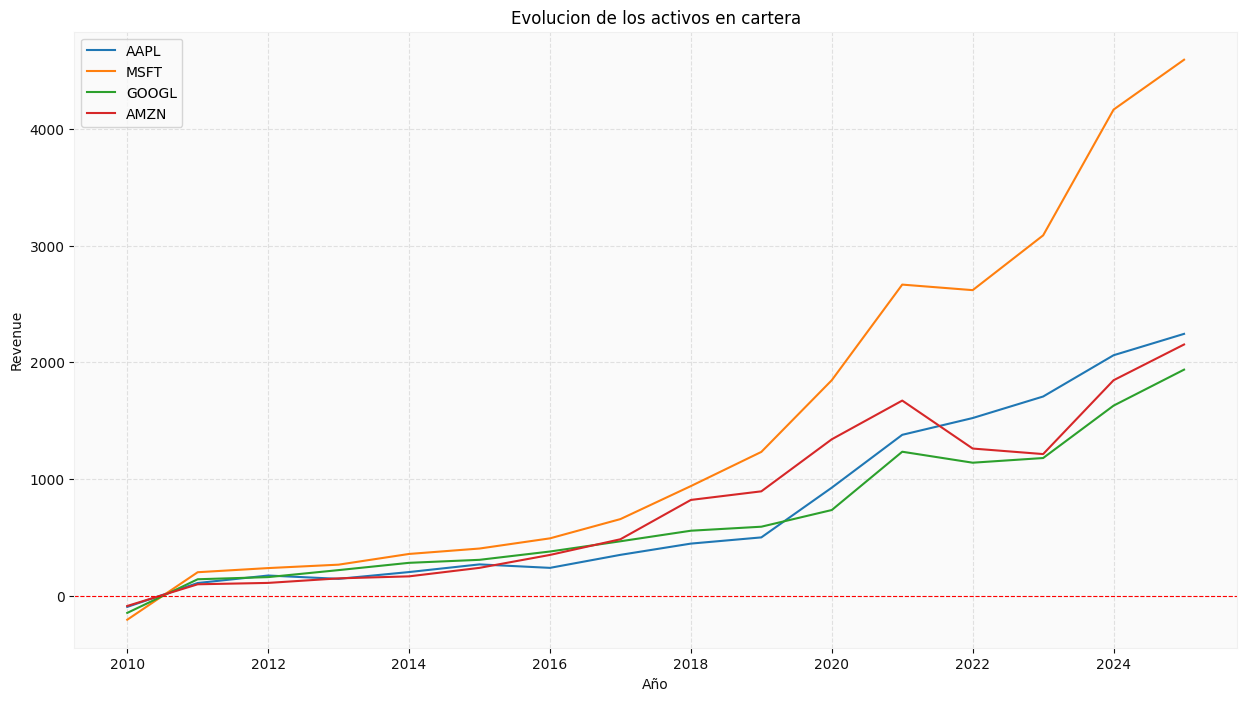

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(dfcloseperyear)
plt.title('Evolucion de los activos en cartera') # Añadir un título para claridad
plt.xlabel('Año') # Añadir etiqueta al eje x
plt.ylabel('Revenue') # Añadir etiqueta al eje y
plt.legend(dfcloseperyear.columns) # Añadir leyenda usando los nombres de las columnas
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Añadir línea punteada en y=0
plt.grid(True, linestyle='--', alpha=0.6) # Añadir una cuadrícula suave
plt.show()

Ahora suponiendo un costo de capital = 9.62%

In [ ]:
# Tasa de descuento de capital (ejemplo)
costo_capital = 0.0962 # 9.62% como se menciona en el markdown anterior

# Diccionario para almacenar las TIRs
tirs = {}

# Iterar sobre cada columna (activo) en el DataFrame
for columna in dfcloseperyear.columns:
    # Extraer los flujos de caja para el activo actual
    # La primera fila ya está como inversión inicial negativa
    flujos = dfcloseperyear[columna].tolist()

    # Calcular la TIR. nf.irr requiere al menos un flujo positivo y uno negativo.
    # También puede devolver nan si no hay TIR válida.
    try:
        tir_activo = nf.irr(flujos)
        tirs[columna] = tir_activo
        print(f"La Tasa Interna de Retorno (TIR) para {columna} es: {tir_activo:.2%}")
    except ValueError:
        print(f"No se pudo calcular la TIR para {columna}. Asegúrese de que haya al menos un flujo positivo y uno negativo.")
    except Exception as e:
        print(f"Ocurrió un error al calcular la TIR para {columna}: {e}")

# Diccionario para almacenar las TIRs
tirsM = {}

Tasadeinversion = 0.3
tasadefinanciamiento = 0.4

print(f"\nCalculo de la Tasa Interna de Retorno Modificada (TIRM) es en base a una tasa de financiamiento de: {tasadefinanciamiento:.2%} y una tasa de inversion: {Tasadeinversion:.2%} ")
# Iterar sobre cada columna (activo) en el DataFrame
for columna in dfcloseperyear.columns:
    # Extraer los flujos de caja para el activo actual
    # La primera fila ya está como inversión inicial negativa
    flujos = dfcloseperyear[columna].tolist()
    # Calcular la TIR. nf.irr requiere al menos un flujo positivo y uno negativo.
    # También puede devolver nan si no hay TIR válida.
    try:
        tirm_activo = nf.mirr(flujos,tasadefinanciamiento,Tasadeinversion)
        tirsM[columna] = tirm_activo
        print(f"La Tasa Interna de Retorno Modificada (TIRM) para {columna} es: {tir_activo:.2%}")
    except ValueError:
        print(f"No se pudo calcular la TIRM para {columna}. Asegúrese de que haya al menos un flujo positivo y uno negativo.")
    except Exception as e:
        print(f"Ocurrió un error al calcular la TIRM para {columna}: {e}")


# Opcional: calcular el VAN para cada activo con el costo de capital dado
vans = {}
print(f"\nCalculando VAN para cada activo con una tasa de descuento del {costo_capital:.2%}:")
for columna in dfcloseperyear.columns:
     flujos = dfcloseperyear[columna].tolist()
     van_activo = nf.npv(costo_capital, flujos)
     vans[columna] = van_activo
     print(f"El Valor Actual Neto (VAN) para {columna} es: {van_activo:,.2f}")

La Tasa Interna de Retorno (TIR) para AAPL es: 144.13%
La Tasa Interna de Retorno (TIR) para MSFT es: 117.55%
La Tasa Interna de Retorno (TIR) para GOOGL es: 117.65%
La Tasa Interna de Retorno (TIR) para AMZN es: 134.60%

Calculo de la Tasa Interna de Retorno Modificada (TIRM) es en base a una tasa de financiamiento de: 40.00% y una tasa de inversion: 30.00% 
La Tasa Interna de Retorno Modificada (TIRM) para AAPL es: 134.60%
La Tasa Interna de Retorno Modificada (TIRM) para MSFT es: 134.60%
La Tasa Interna de Retorno Modificada (TIRM) para GOOGL es: 134.60%
La Tasa Interna de Retorno Modificada (TIRM) para AMZN es: 134.60%

Calculando VAN para cada activo con una tasa de descuento del 9.62%:
El Valor Actual Neto (VAN) para AAPL es: 4,353.77
El Valor Actual Neto (VAN) para MSFT es: 8,321.59
El Valor Actual Neto (VAN) para GOOGL es: 4,078.53
El Valor Actual Neto (VAN) para AMZN es: 4,697.71


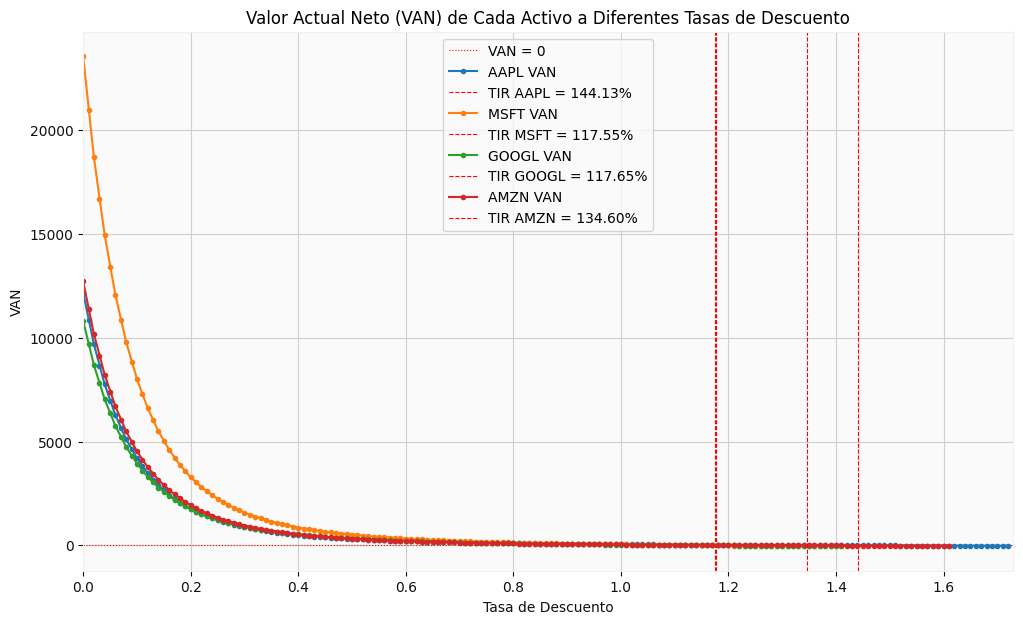

In [ ]:
# Crear figura
plt.figure(figsize=(12, 7))
plt.title('Valor Actual Neto (VAN) de Cada Activo a Diferentes Tasas de Descuento')
plt.xlabel('Tasa de Descuento')
plt.ylabel('VAN')
plt.grid(True)
plt.axhline(0, color='red', linestyle=':', linewidth=0.8, label='VAN = 0')  # Línea en VAN = 0

# Inicializar variable para determinar el máximo de TIRs (por si hay que extender el eje)
tir_max = 0

# Iterar sobre cada activo
for columna in dfcloseperyear.columns:
    flujos_activo = dfcloseperyear[columna].tolist()

    # Calcular la TIR del activo
    tir = nf.irr(flujos_activo)

    # Guardar la mayor TIR para ajustar el rango del gráfico
    if tir > tir_max:
        tir_max = tir

    # Crear rango de tasas adaptativo (si la TIR es alta, ampliar eje)
    tasas_descuento_rango = np.arange(0, max(0.5, tir * 1.2), 0.01)

    # Calcular VAN para cada tasa
    van_por_tasa_activo = [nf.npv(tasa, flujos_activo) for tasa in tasas_descuento_rango]

    # Graficar la curva del VAN
    plt.plot(tasas_descuento_rango, van_por_tasa_activo, marker='.', linestyle='-', label=f'{columna} VAN')

    # Marcar la TIR si es positiva
    if tir > 0:
        plt.axvline(tir, color='red', linestyle='--', linewidth=0.8, label=f'TIR {columna} = {tir:.2%}')

# Ajustar límites del eje x para incluir la TIR más alta
plt.xlim(0, max(0.5, tir_max * 1.2))

plt.legend()
plt.show()


In [ ]:
print("\nCalculando Índice de Rentabilidad (IR) para cada activo:\n")

# Diccionario para almacenar los Índices de Rentabilidad (IR)
irs = {}

# Asumiendo que 'costo_capital' ya está definido (0.08 en el código anterior)
# Si no lo estuviera, se podría definir aquí: costo_capital = 0.08

for columna in dfcloseperyear.columns:
    flujos_activo = dfcloseperyear[columna].tolist()

    # La inversión inicial es el valor absoluto del primer flujo de caja (que es negativo)
    # Si no hay flujos, o el primero no es la inversión, esto necesitaría ajuste.
    if not flujos_activo:
        print(f"No hay flujos de caja para {columna}. No se puede calcular el IR.")
        continue

    inversion_inicial_activo = abs(flujos_activo[0])

    # Calcular el Valor Actual Neto (VAN) para el activo
    van_activo = nf.npv(costo_capital, flujos_activo)

    # Calcular el Índice de Rentabilidad (IR)
    # Asegurarse de que la inversión inicial no sea cero para evitar división por cero
    if inversion_inicial_activo != 0:
        ir_activo = van_activo / inversion_inicial_activo
        irs[columna] = ir_activo
        print(f"El Índice de Rentabilidad (IR) para {columna} es: {ir_activo:.2f}")
    else:
        print(f"La inversión inicial para {columna} es cero, no se puede calcular el IR.")


Calculando Índice de Rentabilidad (IR) para cada activo:

El Índice de Rentabilidad (IR) para AAPL es: 45.72
El Índice de Rentabilidad (IR) para MSFT es: 40.55
El Índice de Rentabilidad (IR) para GOOGL es: 27.77
El Índice de Rentabilidad (IR) para AMZN es: 53.71


In [ ]:
print("\nCalculando Periodo de Recuperación Simple (PRS) y Periodo de Recuperación Descontado (PRD) para cada activo:\n")

# Asegurarse de que nf (numpy_financial) está importado
import numpy_financial as nf

# Tasa de descuento de capital (ya definida como costo_capital)

for columna in dfcloseperyear.columns:
    print(f"--- Activo: {columna} ---")
    flujos_activo = dfcloseperyear[columna].tolist()

    if not flujos_activo or flujos_activo[0] >= 0:
        print(f"  No se puede calcular PRS/PRD para {columna}: Flujos de caja inválidos o no hay inversión inicial negativa.\n")
        continue

    inversion_inicial = abs(flujos_activo[0])

    # --- Calcular Periodo de Recuperación Simple (PRS) ---
    cumulative_cash_flow = 0
    prs = None
    for t in range(1, len(flujos_activo)):
        cumulative_cash_flow += flujos_activo[t]
        if cumulative_cash_flow >= inversion_inicial:
            remaining_investment = inversion_inicial - (cumulative_cash_flow - flujos_activo[t])
            prs = t - 1 + (remaining_investment / flujos_activo[t])
            break

    if prs is not None:
        print(f"  Periodo de Recuperación Simple (PRS): {prs:.2f} años")
    else:
        print("  La inversión inicial no se recupera dentro del período del análisis (PRS).")

    # --- Calcular Periodo de Recuperación Descontado (PRD) ---
    cumulative_discounted_cash_flow = 0
    prd = None
    for t in range(1, len(flujos_activo)):
        discounted_flow = flujos_activo[t] / ((1 + costo_capital)**t)
        cumulative_discounted_cash_flow += discounted_flow
        if cumulative_discounted_cash_flow >= inversion_inicial:
            remaining_investment = inversion_inicial - (cumulative_discounted_cash_flow - discounted_flow)
            prd = t - 1 + (remaining_investment / discounted_flow)
            break

    if prd is not None:
        print(f"  Periodo de Recuperación Descontado (PRD): {prd:.2f} años\n")
    else:
        print("  La inversión inicial no se recupera dentro del período del análisis descontado (PRD).\n")


Calculando Periodo de Recuperación Simple (PRS) y Periodo de Recuperación Descontado (PRD) para cada activo:

--- Activo: AAPL ---
  Periodo de Recuperación Simple (PRS): 0.87 años
  Periodo de Recuperación Descontado (PRD): 0.96 años

--- Activo: MSFT ---
  Periodo de Recuperación Simple (PRS): 1.02 años
  Periodo de Recuperación Descontado (PRD): 1.11 años

--- Activo: GOOGL ---
  Periodo de Recuperación Simple (PRS): 1.03 años
  Periodo de Recuperación Descontado (PRD): 1.13 años

--- Activo: AMZN ---
  Periodo de Recuperación Simple (PRS): 0.89 años
  Periodo de Recuperación Descontado (PRD): 0.98 años



---

Bonus: usando un dataset

In [ ]:
import pandas as pd
import plotly.express as px

# Dataset alternativo (sample funcional)
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)

# Verificar datos
print("Muestra de datos:")
print(df[['neighbourhood_group', 'room_type', 'price', 'minimum_nights']].head())

# Dashboard Analítico Básico
fig1 = px.scatter(df, x='price', y='number_of_reviews', color='room_type', title='Precio vs Reviews')
fig2 = px.box(df, x='neighbourhood_group', y='price', title='Precios por Zona')
fig1.show()
fig2.show()

Muestra de datos:
  neighbourhood_group        room_type  price  minimum_nights
0            Brooklyn     Private room    149               1
1           Manhattan  Entire home/apt    225               1
2           Manhattan     Private room    150               3
3            Brooklyn  Entire home/apt     89               1
4           Manhattan  Entire home/apt     80              10


In [ ]:
# Importar bibliotecas
import pandas as pd
import plotly.express as px
from ipywidgets import interact
import plotly.io as pio


# Configurar renderizado en Colab

pio.renderers.default = 'colab'

In [ ]:
# Cargar datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)

# Limpieza básica
df = df.dropna(subset=['price', 'neighbourhood_group', 'room_type'])
df = df[df['price'] <= 1000]  # Filtrar precios extremos
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
# --------------------------------------
# Funciones para gráficos
# --------------------------------------
def crear_mapa(df_filtrado):
    fig = px.scatter_mapbox(
        df_filtrado,
        lat="latitude",
        lon="longitude",
        color="neighbourhood_group",
        size="price",
        hover_name="name",
        zoom=9,
        height=600,
        title="Distribución Geográfica de Propiedades"
    )
    fig.update_layout(mapbox_style="open-street-map")
    fig.show()

def crear_histograma(df_filtrado):
    fig = px.histogram(
        df_filtrado,
        x="price",
        nbins=50,
        title="Distribución de Precios",
        color="room_type"
    )
    fig.show()

def crear_boxplot(df_filtrado):
    fig = px.box(
        df_filtrado,
        x="neighbourhood_group",
        y="price",
        color="room_type",
        title="Precios por Zona y Tipo de Habitación"
    )
    fig.show()

In [ ]:
# configuración para colab:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# --------------------------------------
# Widgets interactivos
# --------------------------------------
@interact.options(manual=True)
def actualizar_dashboard(
    Zona=df['neighbourhood_group'].unique(),
    Tipo_Habitacion=df['room_type'].unique(),
    Precio_Max=(0, 1000, 50)
):
    # Filtrar datos
    df_filtrado = df[
        (df['neighbourhood_group'] == Zona) &
        (df['room_type'] == Tipo_Habitacion) &
        (df['price'] <= Precio_Max)
    ]


    # Mostrar gráficos secuencialmente
    crear_mapa(df_filtrado)
    #crear_histograma(df_filtrado)
    #crear_boxplot(df_filtrado)

# Mensaje de confirmación
print("✅ ¡Dashboard listo!")

interactive(children=(Dropdown(description='Zona', options=('Brooklyn', 'Manhattan', 'Queens', 'Staten Island'…

✅ ¡Dashboard listo!


In [ ]:
# --------------------------------------
# Widgets interactivos
# --------------------------------------
@interact.options(manual=True)
def actualizar_dashboard(
    Zona=df['neighbourhood_group'].unique(),
    Tipo_Habitacion=df['room_type'].unique(),
    Precio_Max=(0, 1000, 50)
):
    # Filtrar datos
    df_filtrado = df[
        (df['neighbourhood_group'] == Zona) &
        (df['room_type'] == Tipo_Habitacion) &
        (df['price'] <= Precio_Max)
    ]


    # Mostrar gráficos secuencialmente
    #crear_mapa(df_filtrado)
    #crear_histograma(df_filtrado)
    crear_boxplot(df_filtrado)

# Mensaje de confirmación
print("✅ ¡Dashboard listo!")

interactive(children=(Dropdown(description='Zona', options=('Brooklyn', 'Manhattan', 'Queens', 'Staten Island'…

✅ ¡Dashboard listo!


In [ ]:
# --------------------------------------
# Widgets interactivos
# --------------------------------------
@interact.options(manual=True)
def actualizar_dashboard(
    Zona=df['neighbourhood_group'].unique(),
    Tipo_Habitacion=df['room_type'].unique(),
    Precio_Max=(0, 1000, 50)
):
    # Filtrar datos
    df_filtrado = df[
        (df['neighbourhood_group'] == Zona) &
        (df['room_type'] == Tipo_Habitacion) &
        (df['price'] <= Precio_Max)
    ]


    # Mostrar gráficos secuencialmente
    #crear_mapa(df_filtrado)
    crear_histograma(df_filtrado)
    #crear_boxplot(df_filtrado)

# Mensaje de confirmación
print("✅ ¡Dashboard listo!")

interactive(children=(Dropdown(description='Zona', options=('Brooklyn', 'Manhattan', 'Queens', 'Staten Island'…

✅ ¡Dashboard listo!


In [ ]:
https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYmprOHNtMGM2d2ZlMG51bHllYXNtNWdiNGNpZjR5cmxuMGs2dTZvayZlcD12MV9naWZzX3NlYXJjaCZjdD1n/Dh5q0sShxgp13DwrvG/giphy.gif

SyntaxError: invalid syntax (ipython-input-605893633.py, line 1)

In [ ]:
#@title Si se sienten asi, no duden de consultar el Martes!
from IPython.display import Image
Image(url='https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYmprOHNtMGM2d2ZlMG51bHllYXNtNWdiNGNpZjR5cmxuMGs2dTZvayZlcD12MV9naWZzX3NlYXJjaCZjdD1n/Dh5q0sShxgp13DwrvG/giphy.gif')

Recomendaciones para reforzar conceptos:

* https://www.youtube.com/watch?v=O6e5hQuuh4Y
* https://www.youtube.com/watch?v=bR7kpi67CU8&list=PLy3uMcjl1UUU8R9V9clYZunauB5JzE-V4&index=2 --> Pueden decidir optar por este camino a la hora de calcular, es mas sencillo, no descarten las opciones. (TNA no entra al parcial las tasas estaran expresadas en efectivas)
* Nocion de que es la tir y como funciona --> https://www.youtube.com/watch?v=5YUMx7oc1Jw&list=PLy3uMcjl1UUU8R9V9clYZunauB5JzE-V4&index=10
* https://www.youtube.com/watch?v=TSBaVDReZfQ&list=PLy3uMcjl1UUU8R9V9clYZunauB5JzE-V4&index=29 --> ¿Que son las acciones?